In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score 

In [39]:
%store -r data
%store -r X_pca

In [40]:
data = data.sample(n = 8000)
X = data.drop(' shares', axis = 1)
Y = data[' shares']

In [41]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [42]:
knn = NearestNeighbors(n_neighbors = 4).fit(X)
neigh_dist, neigh_ind = knn.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

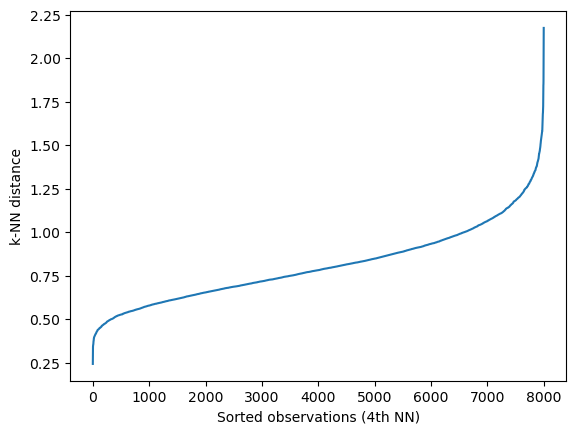

In [43]:
k_dist = sort_neigh_dist[:, 3]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [44]:
knee = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online = True)
print(knee.knee_y)
eps = knee.knee_y

1.712044777641874


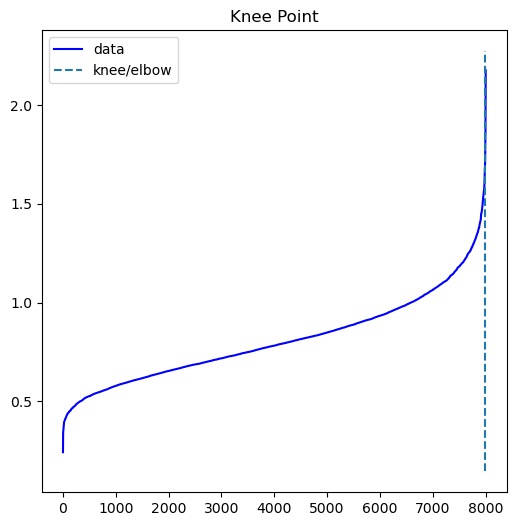

In [45]:
knee.plot_knee()
plt.show()

In [46]:
db = DBSCAN(eps = eps, min_samples = 4).fit(X)

In [48]:
print(set(db.labels_))
Counter(db.labels_) # value of -1 represents noise
print(silhouette_score(X, db.labels_))

{0, 1, 2, 3, -1}
0.11617169049260928


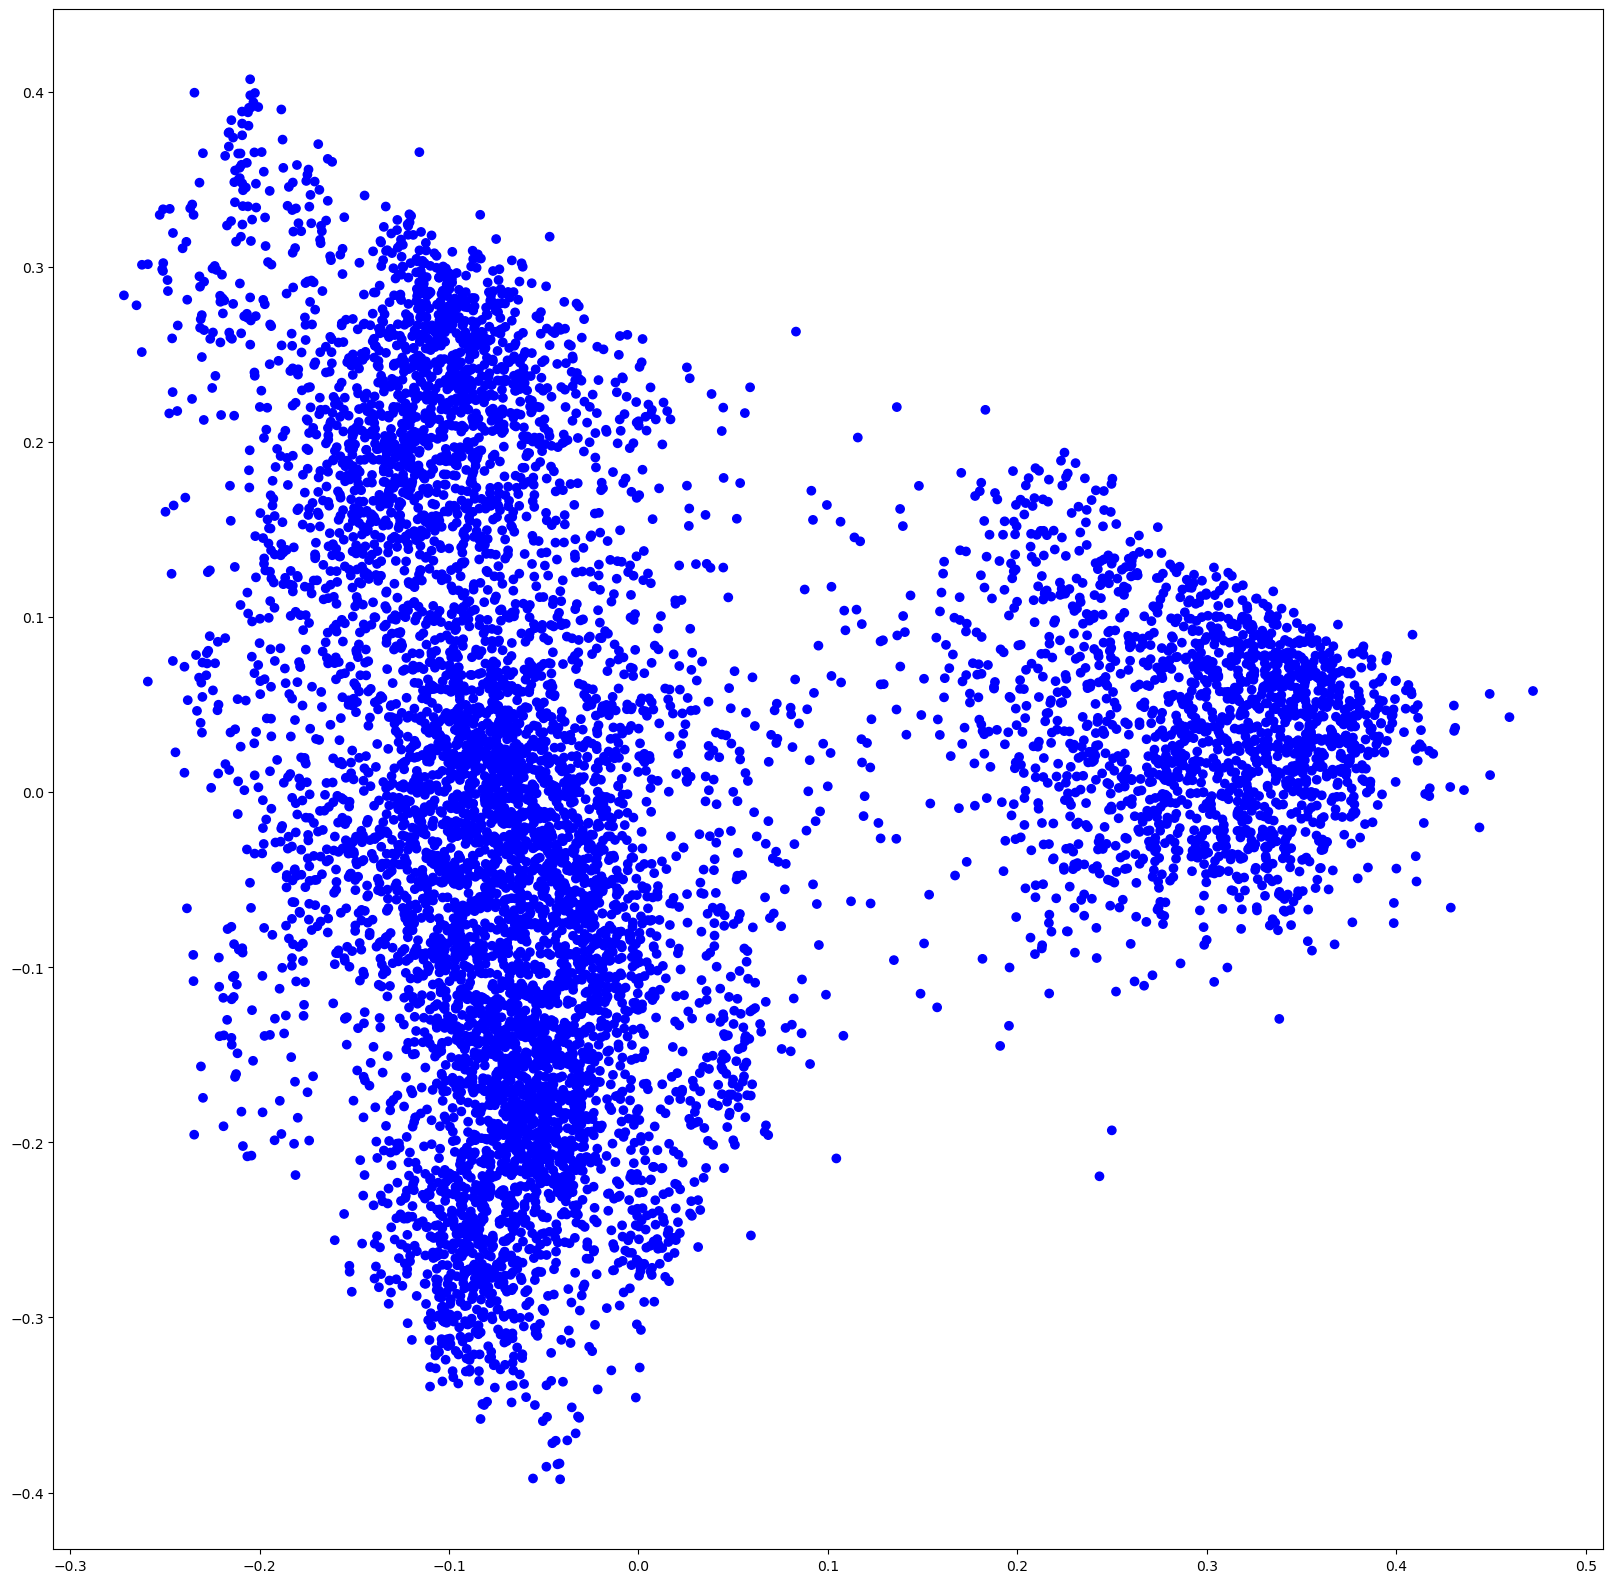

In [49]:
fig = plt.figure(figsize = (20,20))
colors = np.array([x for x in 'brgy'])
labels = db.fit_predict(X_pca)
plt.scatter(x = X_pca['C1'], y = X_pca['C2'], color = colors[labels])

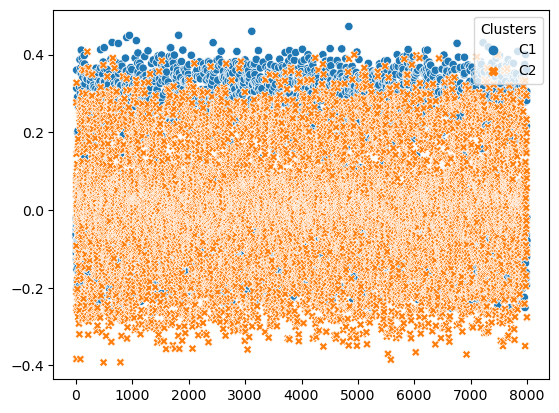

In [50]:
p = sns.scatterplot(data = X_pca)
sns.move_legend(p, "upper right", title = 'Clusters')
plt.show()

In [51]:
best_score = float('-inf')
best_model = None
eps_values = [1.4, 1.6, 1.8, 2, 2.5, 3, 4]

for eps in eps_values:
    for min_samples in range(2, 6):
        model = DBSCAN(eps = eps, min_samples = min_samples)
        
        model.fit(X)
        
        if(len(set(model.labels_)) == 1):
            continue
        
        score = silhouette_score(X, model.labels_)
            
        if score > best_score:
            best_score = score
            best_model = model
        
        print(f'{min_samples}, {eps} -> {score}')

2, 1.4 -> 0.17211917255148546
3, 1.4 -> 0.17867315779008383
4, 1.4 -> 0.17867315779008383
5, 1.4 -> 0.17845606171094294
2, 1.6 -> 0.11582213774565064
3, 1.6 -> 0.11582213774565064
4, 1.6 -> 0.11582213774565064
5, 1.6 -> 0.11582237243042406
2, 1.8 -> 0.22441104184413121
3, 1.8 -> 0.22441104184413121
4, 1.8 -> 0.22441104184413121
5, 1.8 -> 0.22441104184413121
2, 2 -> 0.2309789486464409
3, 2 -> 0.2309789486464409
4, 2 -> 0.2309789486464409
5, 2 -> 0.2309789486464409


In [53]:
print(best_score)
print(best_model)

0.2309789486464409
DBSCAN(eps=2, min_samples=2)
